In [2]:
import pandas as pd                     # Libreria para la manipulación y análisis de datos.
import numpy as np                      # Libreria para el manejo de vectores y matrices de grandes dimensiones.
import scipy.signal as signal           # Libreria para el procesamiento de señales.
import scipy.io as sio                  # Scipy es una libreria usada para cargar diferentes tipos de archivos.
import matplotlib.pyplot as plt         # Libreria para la generación de gráficos.

### 3.2 Representación de señales

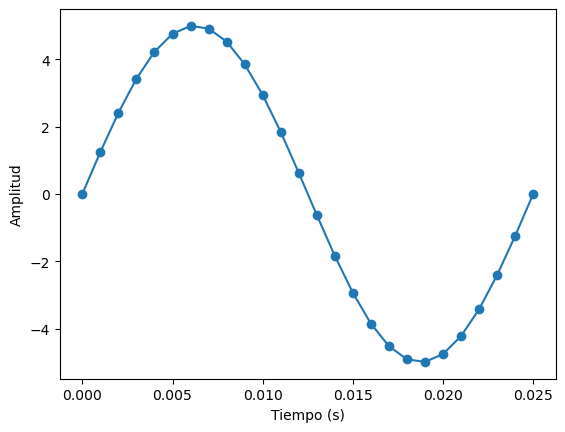

In [2]:
Fo = 40 # Frecuencia fundamental de la señal
Tp = 1/Fo # Periodo de la señal
Fs = 1000 # Frecuencia de muestreo
T = 0.001 # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la señal con duración de Tp más una muestra T
A = 5
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

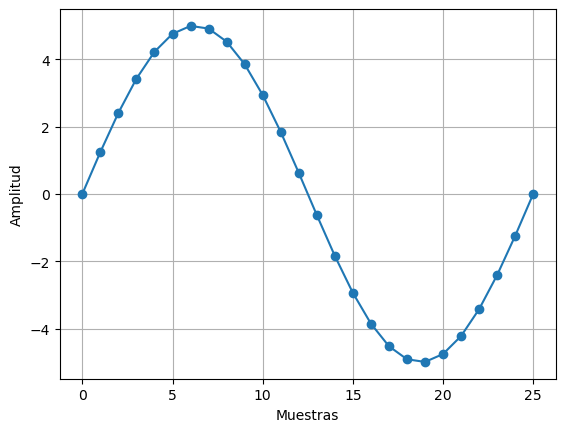

In [3]:
fo = Fo/Fs
n = np.arange(0, len(t)) #Vector de muestras 
x1 = A*np.sin(2*np.pi*fo*n)
plt.plot(n, x1, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

A) Compruebe que los valores de las primeras cinco muestras son los mismos. 


In [8]:
'Se toman las primeras 5 muestras de cada gráfico y se genera un vector booleano'

Prueba = x[0:5]== x1[0:5]
print(Prueba)

[ True  True  True  True  True]


### 3.3 Energia y potencia en el dominio del tiempo

In [19]:
energia = sum(x**2)
potencia = energia/(len(t)-1)

print("La potencia de x(n) es "+ str(round(potencia,2)))
rms = np.sqrt(potencia)
'------------------------------------------------------------------------------'
t10 = np.arange(0,10*Tp+T,T)
x10 = A*np.sin(2*np.pi*Fo*t10)
energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
print("La potencia de x10 es "+ str(round(potencia10,2)))
rms10 = np.sqrt(potencia)

La potencia de x(n) es 12.5
La potencia de x10 es 12.5


b) La potencia es la misma que en x(n) ¿Por qué?

Como se observa para ambos casos, la potencia es la misma. Esto se debe al límite que define la función de la potencia, que no depende del número de ciclos sino del periodo de la señal en tiempo discreto y de la señal como tal que es x(n) 

# 4. Aplicación 

### 4.1 Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 60, 120 y 360 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla.

In [4]:
Fa=60; Fb=120; Fc=360
''' Para determinar la frecuencia de muestreo necesaria para representar esta señal,
podemos usar el criterio de Nyquist-Shannon, que establece que la frecuencia de muestreo debe 
ser al menos dos veces mayor que la frecuencia más alta presente en la señal. En este caso,
la frecuencia más alta es 360 Hz, por lo que  '''
print('la frecuencia de muestreo mínima necesaria sería '+str(2*Fc))
Fs = 2*Fc
Ts= 1/Fs

''' El periodo corresponde a la frecuencia que represente el menos periodo,
por lo tanto entre las 3 frecuencias se selecciona la de 60Hz'''

Tf= 1/Fa

la frecuencia de muestreo mínima necesaria sería 720


In [5]:
t=np.arange(0,Tf+Ts,Ts)

y1=5*np.sin(2*np.pi*60*t);
y2=2*np.sin(2*np.pi*120*t)
y3=0.1*np.sin(2*np.pi*360*t)
y=y1+y2+y3


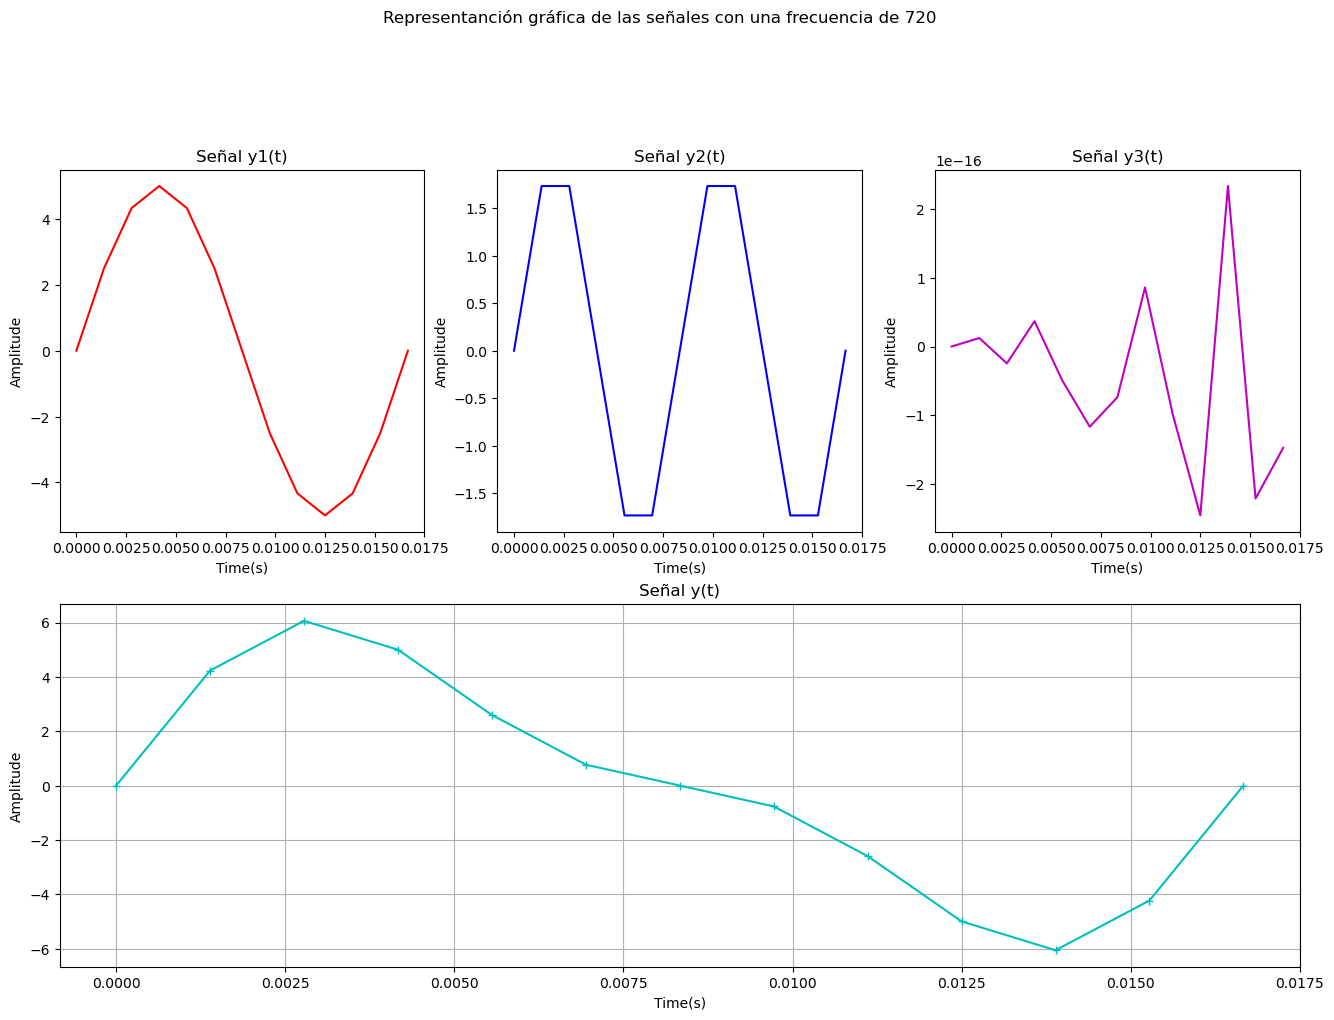

In [6]:
plt.figure(figsize=(16,16))
plt.subplot(3,3,1)
plt.plot(t,y1,'r-')
plt.xlabel('Time(s)');plt.ylabel('Amplitude');plt.title('Señal y1(t)')
plt.subplot(3,3,2)
plt.plot(t,y2,'b-')
plt.xlabel('Time(s)');plt.ylabel('Amplitude');plt.title('Señal y2(t)')
plt.subplot(3,3,3)
plt.plot(t,y3,'m-')
plt.xlabel('Time(s)');plt.ylabel('Amplitude');plt.title('Señal y3(t)')
plt.subplot(3,3,(4,6))
plt.plot(t,y,'c+-')
plt.xlabel('Time(s)');plt.ylabel('Amplitude');plt.title('Señal y(t)')
plt.suptitle('Representanción gráfica de las señales con una frecuencia de %s'%Fs)
plt.grid()

Notese que aunque la frecuencia de muestreo minima logra representar una parte de la señal, esa frecuencia no es la más apropiada para respresentar el comportamiento temporal de las señales, por lo tanto se procede a utilizar una frecuencia aún mayor.

In [7]:
Fs2=2*Fc*4
Ts2=1/Fs2

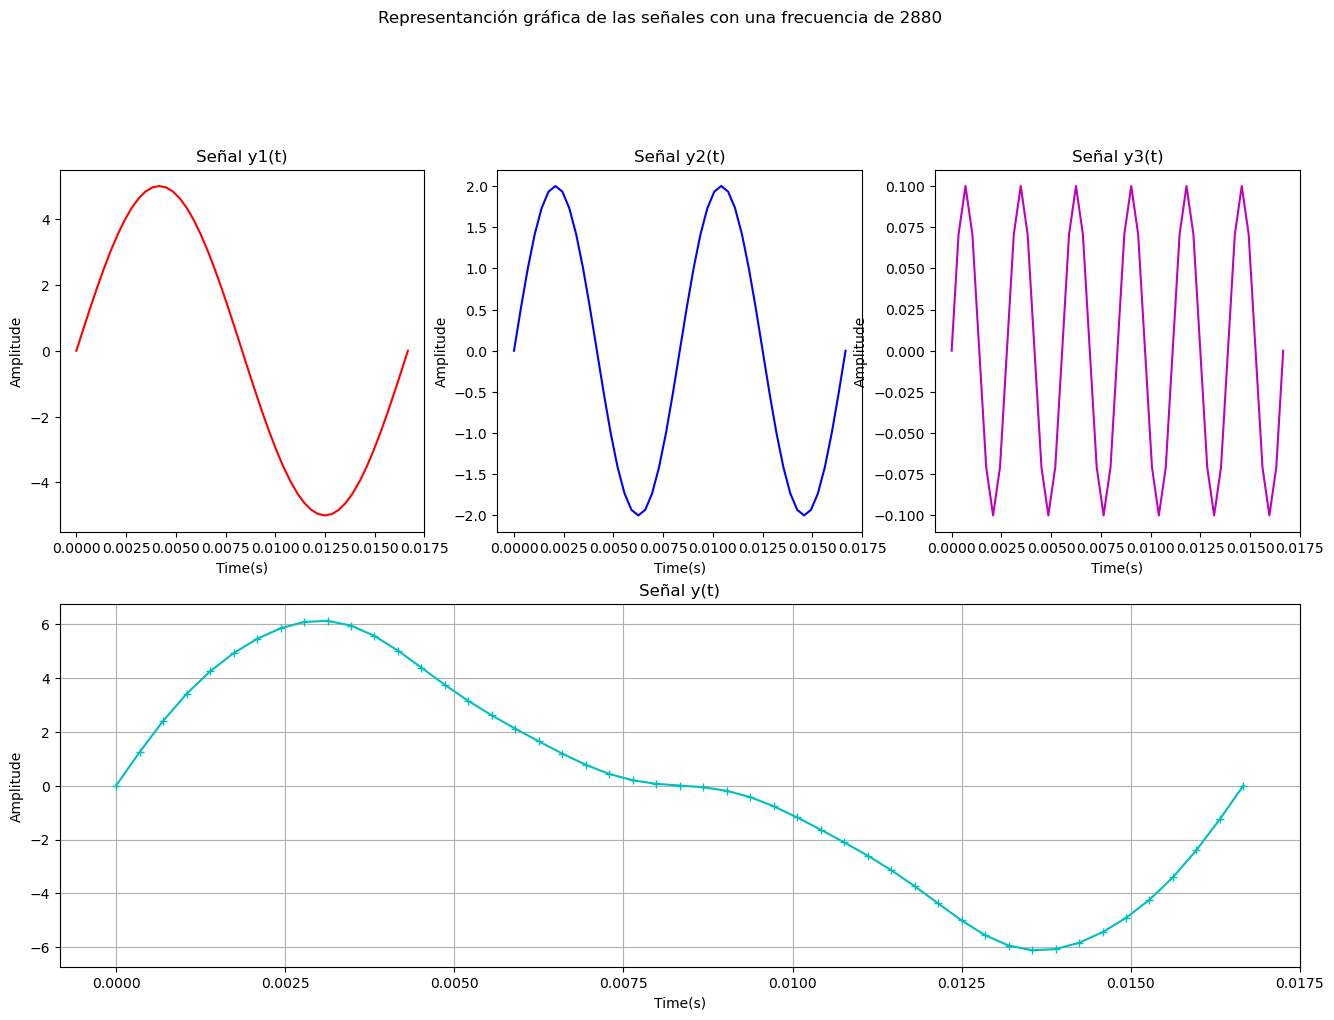

In [8]:
t=np.arange(0,Tf+Ts2,Ts2)

y1=5*np.sin(2*np.pi*60*t);
y2=2*np.sin(2*np.pi*120*t)
y3=0.1*np.sin(2*np.pi*360*t)
y=y1+y2+y3
'________________________________________________'
plt.figure(figsize=(16,16))
plt.subplot(3,3,1)
plt.plot(t,y1,'r-')
plt.xlabel('Time(s)');plt.ylabel('Amplitude');plt.title('Señal y1(t)')
plt.subplot(3,3,2)
plt.plot(t,y2,'b-')
plt.xlabel('Time(s)');plt.ylabel('Amplitude');plt.title('Señal y2(t)')
plt.subplot(3,3,3)
plt.plot(t,y3,'m-')
plt.xlabel('Time(s)');plt.ylabel('Amplitude');plt.title('Señal y3(t)')
plt.subplot(3,3,(4,6))
plt.plot(t,y,'c+-')
plt.xlabel('Time(s)');plt.ylabel('Amplitude');plt.title('Señal y(t)')
plt.suptitle('Representanción gráfica de las señales con una frecuencia de %s'%Fs2)
plt.grid()


En este caso, al aumentar la cantidad de puntos, mejor calidad de gráficas se obtienen. 

### 4.2 Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 ciclos de la señal).

Text(0.5, 1.0, '10 ciclos de la Señal y(t)')

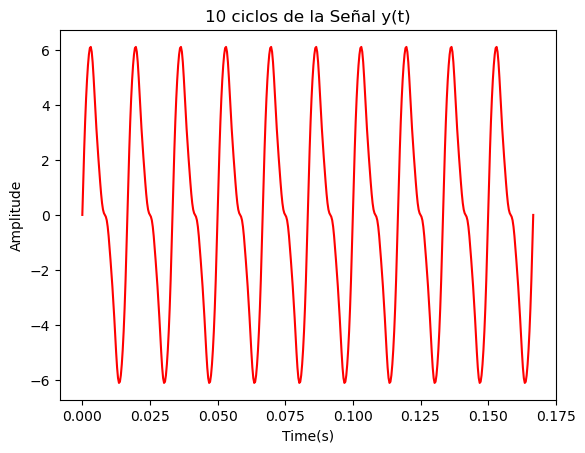

In [9]:
c=10 #Número de ciclos
Tf2=10*Tf
t=np.arange(0,Tf2+Ts2,Ts2)

y1=5*np.sin(2*np.pi*60*t);
y2=2*np.sin(2*np.pi*120*t)
y3=0.1*np.sin(2*np.pi*360*t)
y=y1+y2+y3

plt.plot(t,y,'r');plt.xlabel('Time(s)');plt.ylabel('Amplitude');plt.title('10 ciclos de la Señal y(t)')

In [10]:
# Calcular la transformada de Fourier
Y = np.fft.fft(y)


In [11]:
N=len(Y);
Nmitad = int(np.ceil(N/2));
Fmitad = np.arange(0,Nmitad)*Fs2/N;
nmitad = np.arange(0,Nmitad,1)
Ymitad=Y[0:Nmitad];

Text(0.5, 1.0, 'Espectro de frecuencias para la señal y(t)')

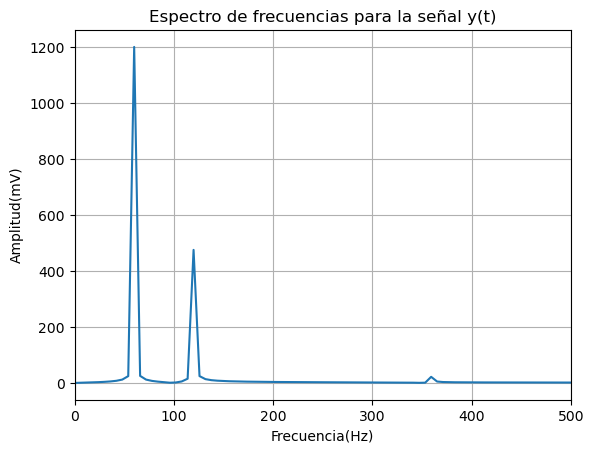

In [12]:
plt.plot(Fmitad,abs(Ymitad))
plt.rcParams['figure.figsize'] = 8,5
plt.xlabel("Frecuencia(Hz)")                                         # Nombre eje x.  
plt.ylabel("Amplitud(mV)")
plt.xlim(0, 500)
plt.grid()                                      # Nombre eje y.
plt.title("Espectro de frecuencias para la señal y(t)")

Text(0.5, 1.0, 'Modulo de la DFT')

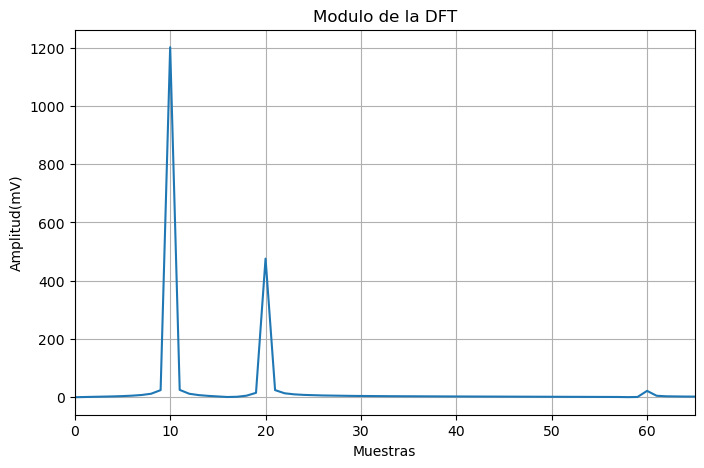

In [13]:
plt.plot(abs(Y))
plt.xlim(0,65)
plt.rcParams['figure.figsize'] = 8,5
plt.xlabel("Muestras")                                         # Nombre eje x.  
plt.ylabel("Amplitud(mV)")
plt.grid()                                      # Nombre eje y.
plt.title("Modulo de la DFT")

### 4.3 Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior. 

La transformada inversa de Fourier (TIF) es una operación matemática que se utiliza para convertir una señal en el dominio de la frecuencia (es decir, una señal en el espectro de frecuencia) en su correspondiente señal en el dominio del tiempo
La transformada inversa de Fourier es una herramienta importante en muchas áreas de la ciencia y la ingeniería, ya que permite analizar y manipular señales en el dominio de la frecuencia y luego volver a convertirlas al dominio del tiempo. Por ejemplo, se utiliza en la compresión de audio y video, procesamiento de imágenes, diseño de filtros y en la solución de ecuaciones diferenciales parciales.
En Python, la transformada inversa de Fourier se puede calcular utilizando la función ifft del paquete numpy.fft. 

Text(0.5, 1.0, 'Espectro de frecuencias para la señal y(t)')

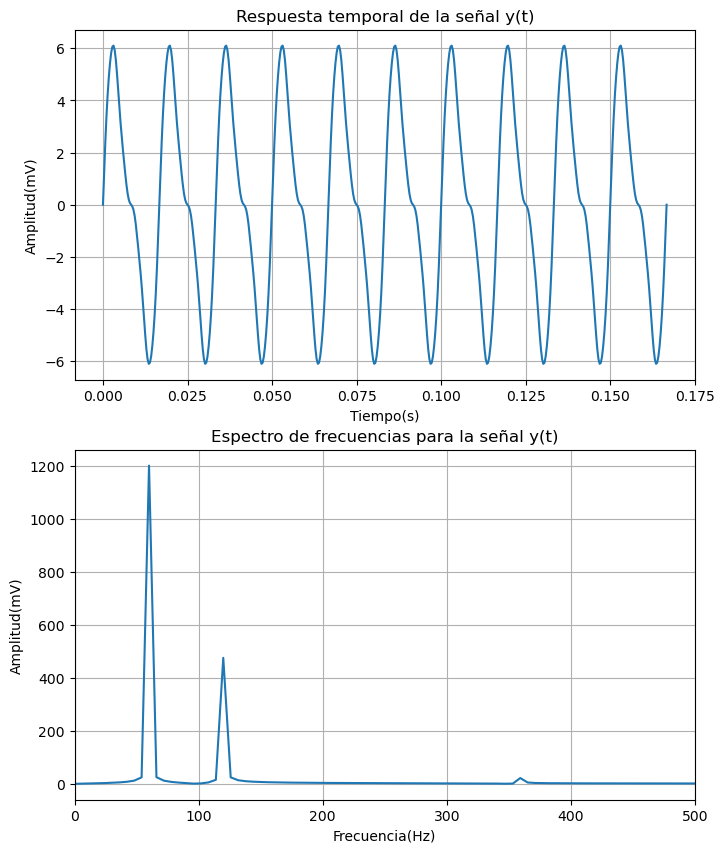

In [23]:
Yt= np.fft.ifft(Y)
plt.rcParams['figure.figsize'] = 8,10
plt.subplot(2,1,1)
plt.plot(t,Yt)
plt.xlabel("Tiempo(s)");plt.ylabel("Amplitud(mV)")
plt.title('Respuesta temporal de la señal y(t)')
plt.grid()
plt.subplot(2,1,2)
plt.plot(Fmitad,abs(Ymitad))
plt.xlabel("Frecuencia(Hz)");plt.ylabel("Amplitud(mV)")
plt.xlim(0, 500)
plt.grid()                                      # Nombre eje y.
plt.title("Espectro de frecuencias para la señal y(t)")

### 4.4 ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?

F1 = np.fft.fft(x); 

F2 = np.zeros((len(F1))); 

F2[9:13] = F1[9:13]; 

xr = np.fft.ifft(F2); 

fig = plt.figure() 

ax = fig.add_subplot(111) 

ax.plot(t, np.real(xr)) 

ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)'); 

plt.show() 

In [32]:
x=np.random.random(100)
ti=np.arange(0,100)

C:\Users\Esteban\AppData\Local\Temp\ipykernel_19372\3159350481.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[9:13] = F1[9:13]; #Se extraen los datos alrededor de la frecuencia en cuestion,es decir el ruido


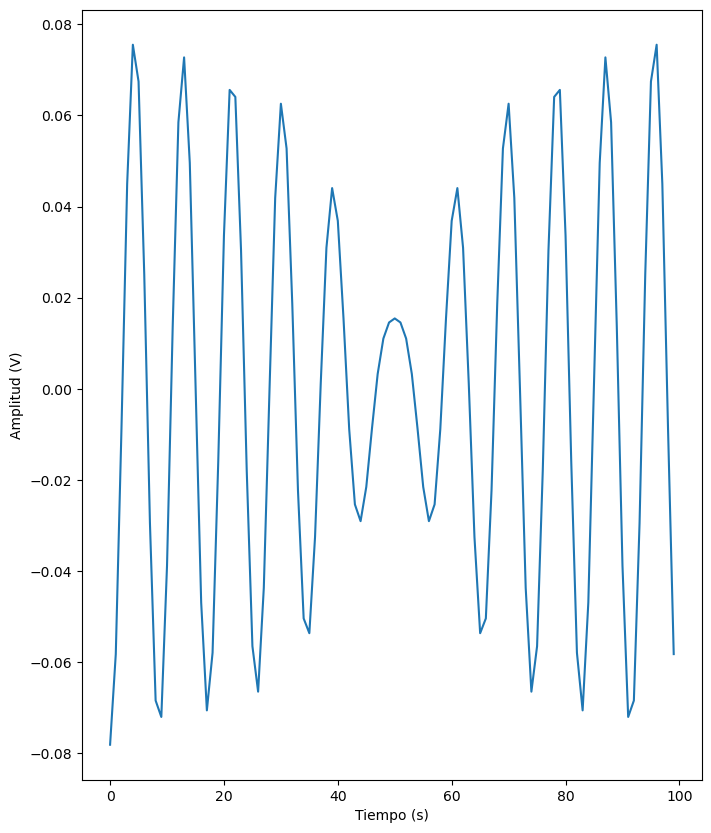

In [33]:
F1 = np.fft.fft(x); # Se aplica la transformada de Fourier a una señal x
F2 = np.zeros((len(F1))); # Se crea una matriz de ceros con igual dimension que la señal x
F2[9:13] = F1[9:13]; #Se extraen los datos de interes, descarta todos los demás valores
xr = np.fft.ifft(F2); # Se aplica la transformada inversa a la matriz F2
fig = plt.figure() #Se genera una figura
ax = fig.add_subplot(111) #Se agrega un subplot en la posicion 1,1,1
ax.plot(ti, np.real(xr)) #Se realiza una grafica de la transformada inversa en funcion del tiempo
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)'); #Se etiquetan los ejes
plt.show() #Se grafica